In [1]:
# Import Libraries
import numpy as np
import pandas as pd

# --> Data Visualization library
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', None)
#plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
import random
random.seed(824)

In [3]:
# Read Data Set and pre-process
per_100_dat = pd.read_csv('Clean_All_NBA_Data.csv')

# Lets consider players who played a threshold number of games and minutes/game
threshold = 10
merged_dat = per_100_dat[ ( (per_100_dat["G"]) > threshold ) & ( (per_100_dat["MP"]/per_100_dat["G"]) > 25 )]

merged_dat.reset_index(drop=True, inplace = True)


merged_dat.head(3)

Season         Player   PlayerId Pos  Age   Tm   G  GS    MP    FG   FGA  \
0  1988-89  Michael Adams  adamsmi01  PG   26  DEN  77  77  2787   7.5  17.3   
1  1988-89   Mark Aguirre  aguirma01  SF   29  TOT  80  76  2597  11.3  24.5   
2  1988-89    Danny Ainge  aingeda01  PG   29  TOT  73  54  2377   9.8  21.4   

     FG%   3P  3PA    3P%    2P   2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  \
0  0.433  2.7  7.5  0.356   4.8   9.9  0.490  5.2  6.3  0.819  1.1  3.4  4.5   
1  0.461  1.0  3.4  0.293  10.3  21.2  0.488  5.6  7.6  0.733  2.8  4.6  7.5   
2  0.457  2.4  6.2  0.380   7.4  15.2  0.488  4.2  4.9  0.854  1.4  3.7  5.2   

   AST  STL  BLK  TOV   PF   PTS   ORtg   DRtg  Year              key_id  \
0  7.8  2.7  0.2  2.9  2.4  22.8  115.0  108.0  1989  Michael Adams-1989   
1  5.4  0.9  0.7  4.0  4.4  29.2  105.0  110.0  1989   Mark Aguirre-1989   
2  8.2  1.9  0.2  3.0  3.8  26.1  116.0  111.0  1989    Danny Ainge-1989   

   All_NBA_Team  All_NBA_Flag All_NBA_Pos Team30  Win_Prop  
0           0.0  Not Selected       Guard    DEN  0.042927  
1           0.0  Not Selected     Forward    TOT  0.033333  
2           0.0  Not Selected       Guard    TOT  0.033333

In [4]:
# --> Sanity Check
# --> Check that there are 15 All NBA selections each year
merged_dat[merged_dat['All_NBA_Flag'] != 'Not Selected'].groupby(['Year']).count()

Season  Player  PlayerId  Pos  Age  Tm   G  GS  MP  FG  FGA  FG%  3P  \
Year                                                                         
1989      15      15        15   15   15  15  15  15  15  15   15   15  15   
1990      15      15        15   15   15  15  15  15  15  15   15   15  15   
1991      15      15        15   15   15  15  15  15  15  15   15   15  15   
1992      15      15        15   15   15  15  15  15  15  15   15   15  15   
1993      15      15        15   15   15  15  15  15  15  15   15   15  15   
1994      15      15        15   15   15  15  15  15  15  15   15   15  15   
1995      15      15        15   15   15  15  15  15  15  15   15   15  15   
1996      15      15        15   15   15  15  15  15  15  15   15   15  15   
1997      15      15        15   15   15  15  15  15  15  15   15   15  15   
1998      15      15        15   15   15  15  15  15  15  15   15   15  15   
1999      15      15        15   15   15  15  15  15  15  15   15   15  15   
2000      15      15        15   15   15  15  15  15  15  15   15   15  15   
2001      15      15        15   15   15  15  15  15  15  15   15   15  15   
2002      15      15        15   15   15  15  15  15  15  15   15   15  15   
2003      15      15        15   15   15  15  15  15  15  15   15   15  15   
2004      15      15        15   15   15  15  15  15  15  15   15   15  15   
2005      15      15        15   15   15  15  15  15  15  15   15   15  15   
2006      15      15        15   15   15  15  15  15  15  15   15   15  15   
2007      15      15        15   15   15  15  15  15  15  15   15   15  15   
2008      15      15        15   15   15  15  15  15  15  15   15   15  15   
2009      15      15        15   15   15  15  15  15  15  15   15   15  15   
2010      15      15        15   15   15  15  15  15  15  15   15   15  15   
2011      15      15        15   15   15  15  15  15  15  15   15   15  15   
2012      15      15        15   15   15  15  15  15  15  15   15   15  15   
2013      15      15        15   15   15  15  15  15  15  15   15   15  15   
2014      15      15        15   15   15  15  15  15  15  15   15   15  15   
2015      15      15        15   15   15  15  15  15  15  15   15   15  15   
2016      15      15        15   15   15  15  15  15  15  15   15   15  15   
2017      15      15        15   15   15  15  15  15  15  15   15   15  15   
2018      15      15        15   15   15  15  15  15  15  15   15   15  15   
2019      15      15        15   15   15  15  15  15  15  15   15   15  15   

      3PA  3P%  2P  2PA  2P%  FT  FTA  FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Year                                                                            
1989   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
1990   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
1991   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
1992   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
1993   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
1994   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
1995   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
1996   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
1997   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
1998   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
1999   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
2000   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
2001   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
2002   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
2003   15   15  15   15   15  15   15   15   15   15   15   15   15   15   15   
2004   15   15  15   15   15  15   15   15   15   15  

In [5]:
# We don't want to mess around with aliases, so lets work on a copy instead
copycat_dat = merged_dat.copy()

# Drop uninteresting columns
copycat_dat = copycat_dat.drop(["Season", "PlayerId", "Pos", "Tm", "key_id", "All_NBA_Team", "Team30"], axis = 1)

# Reset row index
copycat_dat.reset_index(drop=True, inplace = True)

# Add in All-NBA binary response
copycat_dat['binary_response'] = np.where(copycat_dat['All_NBA_Flag'] == "Not Selected", 0, 1)

copycat_dat.head(3)
#copycat_dat.shape

Player  Age   G  GS    MP    FG   FGA    FG%   3P  3PA    3P%    2P  \
0  Michael Adams   26  77  77  2787   7.5  17.3  0.433  2.7  7.5  0.356   4.8   
1   Mark Aguirre   29  80  76  2597  11.3  24.5  0.461  1.0  3.4  0.293  10.3   
2    Danny Ainge   29  73  54  2377   9.8  21.4  0.457  2.4  6.2  0.380   7.4   

    2PA    2P%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  \
0   9.9  0.490  5.2  6.3  0.819  1.1  3.4  4.5  7.8  2.7  0.2  2.9  2.4  22.8   
1  21.2  0.488  5.6  7.6  0.733  2.8  4.6  7.5  5.4  0.9  0.7  4.0  4.4  29.2   
2  15.2  0.488  4.2  4.9  0.854  1.4  3.7  5.2  8.2  1.9  0.2  3.0  3.8  26.1   

    ORtg   DRtg  Year  All_NBA_Flag All_NBA_Pos  Win_Prop  binary_response  
0  115.0  108.0  1989  Not Selected       Guard  0.042927                0  
1  105.0  110.0  1989  Not Selected     Forward  0.033333                0  
2  116.0  111.0  1989  Not Selected       Guard  0.033333                0

In [6]:
# --> Train - Test split
from sklearn.model_selection import train_test_split

# Choose predictors and response
X = copycat_dat.drop(['Player', 'All_NBA_Flag', 'Year', 'binary_response'],axis=1)

y_binary = copycat_dat['binary_response']

# Convert variable All_NBA_Pos into an integer variable, rather than string
from sklearn import preprocessing

position_encoder = preprocessing.LabelEncoder()
X['All_NBA_Pos'] = position_encoder.fit_transform(X['All_NBA_Pos'])

X.head(3)

Age   G  GS    MP    FG   FGA    FG%   3P  3PA    3P%    2P   2PA    2P%  \
0   26  77  77  2787   7.5  17.3  0.433  2.7  7.5  0.356   4.8   9.9  0.490   
1   29  80  76  2597  11.3  24.5  0.461  1.0  3.4  0.293  10.3  21.2  0.488   
2   29  73  54  2377   9.8  21.4  0.457  2.4  6.2  0.380   7.4  15.2  0.488   

    FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS   ORtg  \
0  5.2  6.3  0.819  1.1  3.4  4.5  7.8  2.7  0.2  2.9  2.4  22.8  115.0   
1  5.6  7.6  0.733  2.8  4.6  7.5  5.4  0.9  0.7  4.0  4.4  29.2  105.0   
2  4.2  4.9  0.854  1.4  3.7  5.2  8.2  1.9  0.2  3.0  3.8  26.1  116.0   

    DRtg  All_NBA_Pos  Win_Prop  
0  108.0            2  0.042927  
1  110.0            1  0.033333  
2  111.0            2  0.033333

In [7]:
# Obtain training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary,
                                                    random_state=824, 
                                                    stratify = copycat_dat['All_NBA_Flag'])

In [8]:
# Note: Stratify argument ensures equal proportion of Non-Selected and selected 1st 2nd and 3rd in both train 
#     and test sets

# --> Sanity Check:
# See for yourself
check_train_dat = copycat_dat.iloc[np.array(X_train.index)]

train_prop = check_train_dat.groupby(['All_NBA_Flag']).count()['Player'] / check_train_dat.shape[0]


check_test_dat = copycat_dat.iloc[np.array(X_test.index)]

test_prop = check_test_dat.groupby(['All_NBA_Flag']).count()['Player'] / check_test_dat.shape[0]


print('Rows in Training data:{0}'.format(check_train_dat.shape[0]))
print(train_prop)
print()
print('Rows in Testing data:{0}'.format(check_test_dat.shape[0]))
print(test_prop)

Rows in Training data:3613
All_NBA_Flag
1st             0.032106
2nd             0.032106
3rd             0.032106
Not Selected    0.903681
Name: Player, dtype: float64

Rows in Testing data:1205
All_NBA_Flag
1st             0.032365
2nd             0.032365
3rd             0.032365
Not Selected    0.902905
Name: Player, dtype: float64


In [9]:
check_train_dat.groupby(['All_NBA_Flag']).count()

Player   Age     G    GS    MP    FG   FGA   FG%    3P   3PA  \
All_NBA_Flag                                                                 
1st              116   116   116   116   116   116   116   116   116   116   
2nd              116   116   116   116   116   116   116   116   116   116   
3rd              116   116   116   116   116   116   116   116   116   116   
Not Selected    3265  3265  3265  3265  3265  3265  3265  3265  3265  3265   

               3P%    2P   2PA   2P%    FT   FTA   FT%   ORB   DRB   TRB  \
All_NBA_Flag                                                               
1st            116   116   116   116   116   116   116   116   116   116   
2nd            116   116   116   116   116   116   116   116   116   116   
3rd            116   116   116   116   116   116   116   116   116   116   
Not Selected  3265  3265  3265  3265  3265  3265  3265  3265  3265  3265   

               AST   STL   BLK   TOV    PF   PTS  ORtg  DRtg  Year  \
All_NBA_Flag                                                         
1st            116   116   116   116   116   116   116   116   116   
2nd            116   116   116   116   116   116   116   116   116   
3rd            116   116   116   116   116   116   116   116   116   
Not Selected  3265  3265  3265  3265  3265  3265  3265  3265  3265   

              All_NBA_Pos  Win_Prop  binary_response  
All_NBA_Flag                                          
1st                   116       116              116  
2nd                   116       116              116  
3rd                   116       116              116  
Not Selected         3265      3265             3265

In [10]:
check_test_dat.groupby(['All_NBA_Flag']).count()

Player   Age     G    GS    MP    FG   FGA   FG%    3P   3PA  \
All_NBA_Flag                                                                 
1st               39    39    39    39    39    39    39    39    39    39   
2nd               39    39    39    39    39    39    39    39    39    39   
3rd               39    39    39    39    39    39    39    39    39    39   
Not Selected    1088  1088  1088  1088  1088  1088  1088  1088  1088  1088   

               3P%    2P   2PA   2P%    FT   FTA   FT%   ORB   DRB   TRB  \
All_NBA_Flag                                                               
1st             39    39    39    39    39    39    39    39    39    39   
2nd             39    39    39    39    39    39    39    39    39    39   
3rd             39    39    39    39    39    39    39    39    39    39   
Not Selected  1088  1088  1088  1088  1088  1088  1088  1088  1088  1088   

               AST   STL   BLK   TOV    PF   PTS  ORtg  DRtg  Year  \
All_NBA_Flag                                                         
1st             39    39    39    39    39    39    39    39    39   
2nd             39    39    39    39    39    39    39    39    39   
3rd             39    39    39    39    39    39    39    39    39   
Not Selected  1088  1088  1088  1088  1088  1088  1088  1088  1088   

              All_NBA_Pos  Win_Prop  binary_response  
All_NBA_Flag                                          
1st                    39        39               39  
2nd                    39        39               39  
3rd                    39        39               39  
Not Selected         1088      1088             1088

## Logistic Regression

In [11]:
# Fit model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/petertea/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Evaluate performance:
logreg_pred = logreg.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
logreg_confusion_matrix = confusion_matrix(y_test, logreg_pred)

print("Logistic Regression confusion matrix:")
print(logreg_confusion_matrix)

Logistic Regression confusion matrix:
[[1066   22]
 [  33   84]]


In [13]:
print("Logistic Regression precision report:")
print(classification_report(y_test,  logreg_pred))

Logistic Regression precision report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1088
           1       0.79      0.72      0.75       117

    accuracy                           0.95      1205
   macro avg       0.88      0.85      0.86      1205
weighted avg       0.95      0.95      0.95      1205



In [14]:
def all_nba_test_report(test_index, entire_data, y_pred):
    '''
    Purpose: Report proportion of true 1st, 2nd and 3rd All-NBA players identified by model
    
    Arguments:
    test_index: y test set index (of original data frame)
    entire_data: dataframe used to create train-test datasets
    y_pred: test set predictions of fitted model
    
    '''
    # Extract test set from original dataframe
    to_investigate = copycat_dat.loc[test_index]
    
    #Add prediciton column
    to_investigate['Prediction'] = y_pred
    
    # Calculate sum of predictions for each all-nba team
    # Note: we assume 'binary_response' label for true response
    temp = to_investigate.groupby(['All_NBA_Flag']).agg({'Prediction': 'sum', 'binary_response': 'sum'})
    
    
    # Aesthetic changes
    temp.rename_axis(index={"All_NBA_Flag": "All NBA Team"}, inplace = True)
    temp.rename(columns={"Prediction": "Prediction Total",
                                 "binary_response": "True Total"}, inplace = True)
    
    
    return temp

In [15]:
logreg_performance= all_nba_test_report(test_index = y_test.index, entire_data=copycat_dat,
                                        y_pred = logreg_pred)

logreg_performance

# Save
#logreg_test_report.to_csv('log_reg_performance.csv')

Prediction Total  True Total
All NBA Team                              
1st                         36          39
2nd                         28          39
3rd                         20          39
Not Selected                22           0

In [16]:
# Which players could the model not identify?

def players_missed(entire_dat, test_index, y_pred):
    '''
    Returns dataframe of all the All-NBA players a model was unable to identify
    
    Arguments:
    test_index: y test set index (of original data frame)
    entire_data: dataframe used to create train-test datasets
    y_pred: test set predictions of fitted model
    
    '''
    check_test_dat = entire_dat.iloc[np.array(test_index)]
    
    check_test_dat['Prediction'] = y_pred
    
    temp = check_test_dat[(check_test_dat['binary_response'] ==  int(1)) & (check_test_dat['Prediction'] == int(0)) ]
    
    temp.sort_values(by=['All_NBA_Flag', 'Year','All_NBA_Pos'], inplace = True)
    
    return temp

In [17]:
# --> Which All nba players to we miss?
players_missed(entire_dat=copycat_dat, test_index=X_test.index, y_pred=logreg_pred)

/Users/petertea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/petertea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Player  Age   G  GS    MP    FG   FGA    FG%   3P   3PA  \
826    Latrell Sprewell   23  82  82  3533   8.4  19.4  0.433  1.9   5.4   
1546         Jason Kidd   25  50  50  2060   8.0  18.1  0.444  1.2   3.2   
4057         Marc Gasol   30  81  81  2687  10.3  20.8  0.494  0.1   0.3   
1319          Vin Baker   26  82  82  2944  11.5  21.1  0.542  0.0   0.1   
1625       Chris Webber   25  42  42  1719  11.0  22.6  0.486  0.1   1.0   
1867    Dikembe Mutombo   34  75  75  2591   5.4  11.3  0.484  0.0   0.0   
2364        Ben Wallace   29  81  81  3050   5.6  13.4  0.421  0.0   0.1   
2691        Ben Wallace   31  82  82  2890   4.5   8.9  0.510  0.0   0.1   
3194    Carmelo Anthony   25  69  69  2634  13.2  28.9  0.458  1.1   3.6   
3507  Russell Westbrook   22  82  82  2847  11.2  25.3  0.442  0.6   1.9   
3739      Blake Griffin   23  80  80  2598  11.7  21.7  0.538  0.1   0.6   
3960        Tony Parker   31  68  68  1997  11.5  23.1  0.499  0.6   1.7   
4036   DeMarcus Cousins   24  59  59  2013  12.5  26.7  0.467  0.1   0.2   
4524      DeMar DeRozan   28  80  80  2711  11.7  25.7  0.456  1.6   5.2   
86        Robert Parish   35  80  80  2840  10.3  18.0  0.570  0.0   0.0   
611        Tim Hardaway   26  66  66  2609   9.6  21.6  0.447  1.9   5.7   
1117     Mitch Richmond   30  81  81  2946  10.7  23.9  0.447  3.9   9.0   
1205  Anfernee Hardaway   25  59  59  2221  10.3  23.0  0.447  2.1   6.5   
1522      Kevin Garnett   22  47  47  1780  12.3  26.7  0.460  0.1   0.4   
1708    Stephon Marbury   22  74  74  2881  10.2  23.7  0.432  1.2   4.2   
2320           Yao Ming   23  82  82  2692  10.9  20.8  0.522  0.0   0.0   
2338       Michael Redd   24  82  82  3021  11.0  25.0  0.440  2.2   6.3   
2469       Shawn Marion   26  81  81  3146   9.8  20.5  0.476  1.8   5.4   
2540    Carmelo Anthony   21  80  80  2941  13.1  27.3  0.481  0.6   2.6   
2880      Carlos Boozer   26  81  81  2827  12.9  23.6  0.547  0.0   0.0   
3322        Brandon Roy   25  65  65  2419  11.1  23.5  0.473  1.7   5.0   
3484      Zach Randolph   29  75  74  2724  11.5  22.8  0.503  0.2   0.8   
3355  LaMarcus Aldridge   25  81  81  3211  12.0  24.1  0.500  0.1   0.4   
3628      Dirk Nowitzki   33  62  62  2079  11.9  26.1  0.457  2.0   5.4   
3839  LaMarcus Aldridge   28  69  69  2498  13.2  28.8  0.458  0.1   0.3   
4211     Andre Drummond   22  81  81  2666  10.5  20.1  0.521  0.0   0.1   
4304      Klay Thompson   25  80  80  2666  11.8  25.1  0.470  5.0  11.8   
4805       Kemba Walker   28  82  82  2863  12.4  28.6  0.434  4.4  12.4   

        3P%    2P   2PA    2P%    FT   FTA    FT%  ORB   DRB   TRB   AST  STL  \
826   0.361   6.5  14.1  0.460   4.8   6.3  0.774  1.1   4.4   5.5   5.3  2.5   
1546  0.366   6.9  14.9  0.461   4.7   6.2  0.757  2.3   6.5   8.8  14.0  3.0   
4057  0.176  10.2  20.5  0.500   6.8   8.5  0.795  2.2  10.0  12.2   6.0  1.4   
1319  0.143  11.4  21.0  0.545   5.6   9.6  0.591  5.2   6.7  11.9   2.8  1.7   
1625  0.118  10.9  21.6  0.503   2.3   5.1  0.454  4.3  11.5  15.9   5.0  1.7   
1867  0.000   5.4  11.3  0.484   4.3   5.9  0.725  6.2  14.3  20.6   1.5  0.6   
2364  0.125   5.6  13.3  0.424   2.5   5.2  0.490  5.8  12.2  18.0   2.5  2.6   
2691  0.000   4.5   8.8  0.514   2.4   5.7  0.416  5.8  11.9  17.7   3.0  2.8   
3194  0.316  12.1  25.3  0.478   9.8  11.8  0.830  2.9   5.8   8.7   4.3  1.7   
3507  0.330  10.5  23.4  0.451   9.7  11.5  0.842  2.2   4.7   6.9  12.2  2.8   
3739  0.179  11.6  21.2  0.548   5.7   8.6  0.660  3.8   9.6  13.4   6.1  2.0   
3960  0.373  10.9  21.4  0.509   5.0   6.1  0.811  0.4   3.5   3.9   9.8  0.9   
4036  0.250  12.4  26.5  0.469  10.6  13.5  0.782  4.6  14.1  18.7   5.3  2.3   
4524  0.310  10.1  20.5  0.494   8.4  10.2  0.825  1.1   4.7   5.7   7.6  1.5   
86    0.000  10.3  18.0  0.570   5.1   7.0  0.719  5.9  11.3  17.2   3.0  1.4   
611   0.330   7.8  15.9  0.489   5.0   6.8  0.744  1.1   3.8   4.9  12.9  2.1   
1117  0.437   6.7  14.9  0.453   7.4   8.6  0.866  0.9 

### Logistic Regression Predict this season's All-NBA Winners

In [18]:
# Get scores for current 2020 season
current_dat = pd.read_csv('Clean_current_2020_data.csv')

# Lets consider players who played a threshold number of games and minutes/game
threshold = 10
current_dat = current_dat[ ( (current_dat["G"]) > threshold ) & ( (current_dat["MP"]/current_dat["G"]) > 25 )]

current_dat.head(3)


Player Pos  Age   Tm   G  GS    MP    FG   FGA    FG%   3P  3PA  \
0       Steven Adams   C   26  OKC  58  58  1564   8.2  13.8  0.591  0.0  0.1   
1        Bam Adebayo  PF   22  MIA  65  65  2235   8.9  15.7  0.567  0.0  0.3   
2  LaMarcus Aldridge   C   34  SAS  53  53  1754  10.7  21.7  0.493  1.7  4.3   

     3P%   2P   2PA    2P%   FT  FTA    FT%  ORB   DRB   TRB  AST  STL  BLK  \
0  0.333  8.1  13.7  0.593  3.4  5.7  0.590  6.1  10.8  16.9  4.4  1.6  2.0   
1  0.077  8.9  15.5  0.576  5.2  7.5  0.690  3.6  11.3  15.0  7.3  1.7  1.9   
2  0.389  9.0  17.4  0.519  4.3  5.2  0.827  2.8   7.9  10.7  3.5  1.0  2.4   

   TOV   PF   PTS   ORtg  DRtg All_NBA_Pos  Win_Prop  
0  2.7  3.5  19.7  123.0   106      Center  0.041195  
1  4.0  3.6  23.1  117.0   106     Forward  0.042225  
2  2.0  3.5  27.4  115.0   113      Center  0.027806

In [19]:
# Just checking two players
pd.set_option('display.max_columns', None)
current_dat[(current_dat['Player'] == "Pascal Siakam") | (current_dat['Player'] == "Bam Adebayo")]

Player Pos  Age   Tm   G  GS    MP    FG   FGA    FG%   3P  3PA  \
1      Bam Adebayo  PF   22  MIA  65  65  2235   8.9  15.7  0.567  0.0  0.3   
436  Pascal Siakam  PF   25  TOR  53  53  1882  11.6  25.4  0.459  2.9  8.1   

       3P%   2P   2PA    2P%   FT  FTA   FT%  ORB   DRB   TRB  AST  STL  BLK  \
1    0.077  8.9  15.5  0.576  5.2  7.5  0.69  3.6  11.3  15.0  7.3  1.7  1.9   
436  0.359  8.7  17.2  0.506  5.6  7.0  0.80  1.4   8.7  10.1  4.8  1.3  1.2   

     TOV   PF   PTS   ORtg  DRtg All_NBA_Pos  Win_Prop  
1    4.0  3.6  23.1  117.0   106     Forward  0.042225  
436  3.3  3.8  31.8  108.0   105     Forward  0.047374

In [20]:
current_dat[current_dat['All_NBA_Pos'] == "Forward"].sort_values(by = ['PTS', 'MP'], ascending = False).head(20)

Player    Pos  Age   Tm   G  GS    MP    FG   FGA    FG%  \
11   Giannis Antetokounmpo     PF   25  MIL  57  57  1763  16.2  29.5  0.547   
287          Kawhi Leonard     SF   28  LAC  51  51  1643  13.7  29.2  0.469   
503        Zion Williamson     PF   19  NOP  19  19   565  14.1  23.9  0.589   
243           LeBron James     SF   35  LAL  60  60  2094  13.3  26.7  0.498   
166            Paul George     SF   29  LAC  42  42  1222  11.2  26.0  0.432   
450           Jayson Tatum     PF   21  BOS  59  59  2043  11.8  26.3  0.448   
233         Brandon Ingram     PF   22  NOP  56  56  1919  11.3  24.2  0.466   
328        Khris Middleton     SF   28  MIL  55  52  1653  11.7  23.5  0.499   
436          Pascal Siakam     PF   25  TOR  53  53  1882  11.6  25.4  0.459   
122          DeMar DeRozan     SF   30  SAS  61  61  2091  11.6  22.0  0.526   
161       Danilo Gallinari     PF   31  OKC  55  55  1690   9.5  21.6  0.439   
103           John Collins     PF   22  ATL  41  41  1363  12.1  20.7  0.583   
47        Bojan Bogdanović     SF   30  UTA  63  63  2083   9.8  21.9  0.447   
400     Kristaps Porziņģis     PF   24  DAL  51  51  1597  10.3  24.5  0.420   
495         Andrew Wiggins  SF-SG   24  TOT  54  54  1858  11.0  24.6  0.447   
404          Julius Randle     PF   25  NYK  64  64  2080  10.8  23.5  0.460   
68            Jaylen Brown     SF   23  BOS  50  50  1702  10.7  21.9  0.490   
78            Jimmy Butler     SF   30  MIA  54  54  1851   8.7  19.1  0.454   
485            T.J. Warren     SF   26  IND  61  61  1984  11.3  21.3  0.529   
197          Tobias Harris     PF   27  PHI  65  65  2243  10.7  22.7  0.472   

      3P   3PA    3P%    2P   2PA    2P%    FT   FTA    FT%  ORB   DRB   TRB  \
11   2.2   7.0  0.306  14.0  22.5  0.622   9.4  14.8  0.633  3.4  16.9  20.3   
287  3.1   8.4  0.366  10.6  20.8  0.510   8.9  10.0  0.889  1.5   9.2  10.7   
503  0.5   1.1  0.462  13.6  22.8  0.595   8.0  12.4  0.645  4.5   6.1  10.5   
243  3.0   8.7  0.349  10.3  18.1  0.570   5.4   7.8  0.697  1.3   9.4  10.7   
166  5.1  12.8  0.399   6.1  13.2  0.463   6.4   7.2  0.882  0.8   8.4   9.3   
450  4.0   9.9  0.398   7.9  16.4  0.479   5.3   6.6  0.806  1.3   8.5   9.9   
233  3.3   8.5  0.387   8.0  15.7  0.509   6.8   7.9  0.858  1.2   7.2   8.4   
328  3.7   8.8  0.418   8.0  14.7  0.547   4.9   5.4  0.908  1.1   8.3   9.4   
436  2.9   8.1  0.359   8.7  17.2  0.506   5.6   7.0  0.800  1.4   8.7  10.1   
122  0.2   0.7  0.267  11.4  21.3  0.535   7.8   9.2  0.843  0.9   7.0   7.9   
161  4.8  11.6  0.409   4.7  10.0  0.474   6.7   7.6  0.886  0.9   7.8   8.7   
103  2.0   5.0  0.401  10.1  15.7  0.642   4.1   5.1  0.800  4.0  10.3  14.2   
47   4.4  10.7  0.414   5.4  11.2  0.479   5.9   6.5  0.903  0.9   5.1   6.1   
400  3.8  10.9  0.349   6.5  13.6  0.477   5.4   6.9  0.776  2.7  11.9  14.6   
495  2.8   8.4  0.332   8.2  16.2  0.506   4.8   6.7  0.709  1.7   5.2   6.9   
404  1.5   5.4  0.277   9.3  18.1  0.515   6.0   8.2  0.733  3.5  11.0  14.6   
68   3.0   8.0  0.381   7.7  14.0  0.552   4.5   6.1  0.736  1.5   7.5   9.0   
78   0.8   3.1  0.248   7.9  16.0  0.494  10.8  13.0  0.833  2.6   6.9   9.5   
485  1.7   4.5  0.375   9.6  16.8  0.571   3.7   4.6  0.812  1.5   4.4   5.9   
197  2.5   7.0  0.362   8.2  15.7  0.521   3.3   4.1  0.806  1.2   8.4   9.5   

      AST  STL  BLK  TOV   PF   PTS   ORtg  DRtg All_NBA_Pos  Win_Prop  
11    8.5  1.5  1.5  5.4  4.5  43.8  116.0    96     Forward  0.054583  
287   7.3  2.6  0.9  4.0  2.8  39.3  116.0   104     Forward  0.045314  
503   3.4  1.3  0.7  4.2  2.6  36.6  116.0   113     Forward  0.028836  
243  14.5  1.7  0.7  5.4  2.4  35.1  117.0   105     Forward  0.050463  
166   6.3  2.2  0.8  4.4  3.9  34.0  111.0   105     Forward  0.045314  
450   4.1  2.0  1.3  3.1  2.9  32.9  110.0   105     Forward  0.044284  
233   5.8  1.3  0.9  4.2  3.9  32.7  112.0   112     Forward  0.028836  
328   6.2  1.4  0.2  3.1  3.4  32.0  119.0   103     Forward  0.054583  
4

In [21]:
# Which features were used to fit model?
features_to_keep = X.columns.astype(str)

#Extract these features
features_2020 = current_dat[features_to_keep]
features_2020['All_NBA_Pos'] = position_encoder.fit_transform(features_2020['All_NBA_Pos'])
features_2020.head(3)

/Users/petertea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Age   G  GS    MP    FG   FGA    FG%   3P  3PA    3P%   2P   2PA    2P%  \
0   26  58  58  1564   8.2  13.8  0.591  0.0  0.1  0.333  8.1  13.7  0.593   
1   22  65  65  2235   8.9  15.7  0.567  0.0  0.3  0.077  8.9  15.5  0.576   
2   34  53  53  1754  10.7  21.7  0.493  1.7  4.3  0.389  9.0  17.4  0.519   

    FT  FTA    FT%  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS   ORtg  \
0  3.4  5.7  0.590  6.1  10.8  16.9  4.4  1.6  2.0  2.7  3.5  19.7  123.0   
1  5.2  7.5  0.690  3.6  11.3  15.0  7.3  1.7  1.9  4.0  3.6  23.1  117.0   
2  4.3  5.2  0.827  2.8   7.9  10.7  3.5  1.0  2.4  2.0  3.5  27.4  115.0   

   DRtg  All_NBA_Pos  Win_Prop  
0   106            0  0.041195  
1   106            1  0.042225  
2   113            0  0.027806

In [22]:
# Make our predictions
logreg_predict_probs_2020 = logreg.predict_proba(features_2020)
logreg_predict_binary_2020 = logreg.predict(features_2020)

In [23]:
def predict_2020(positions, player_names, binary_prediction, probability_predictions):
    '''
    Purpose: return clean dataset of predicted All-NBA Winners
    
    Arguments:
    positions: np array of player positions
    player_names: np array of player names
    binary_prediction: np array of binary predictions
    probability_predictions: np array of probability of selection
    
    '''
    
    nba_2020_pred = pd.DataFrame({"Position": positions,
                         "Probability":  probability_predictions, 
                         "Selection": binary_prediction,
                         "Player": player_names})
    
    
    final_predictions = nba_2020_pred.groupby(['Position'])
    temp = final_predictions.apply(lambda x: x.sort_values(['Probability'],
                                                   ascending = False).head(8))
    
    
    # Only select 5 centers instead of 8
    return temp.loc[np.logical_not(temp.index.isin(temp.index[5:8]))]

In [24]:
logreg_2020_predictions = predict_2020(positions=position_encoder.inverse_transform(features_2020['All_NBA_Pos']),
            player_names=current_dat['Player'],
            binary_prediction=logreg_predict_binary_2020,
            probability_predictions= logreg_predict_probs_2020[:,1])

logreg_2020_predictions

logreg_2020_predictions.to_csv("logreg_2020_predictions.csv")

# Random Forests and Decision Trees

In [25]:
# Train single classification tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="gini")

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
# Evaluate Decision Tree
predictions_dtree = dtree.predict(X_test)
print(classification_report(y_test,predictions_dtree))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1088
           1       0.66      0.64      0.65       117

    accuracy                           0.93      1205
   macro avg       0.81      0.80      0.81      1205
weighted avg       0.93      0.93      0.93      1205



# Fit Random Forest (an ensemble of Decision Trees)

In [27]:
#--> Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Train the model using the training sets 
rfc_binary = RandomForestClassifier(n_estimators=200, criterion = "gini")

rfc_binary.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rfc_predictions = rfc_binary.predict(X_test)

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test,rfc_predictions))


print("\nRandom Forest Precisions:")
print(classification_report(y_test,rfc_predictions))

Random Forest Confusion Matrix:
[[1076   12]
 [  40   77]]

Random Forest Precisions:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1088
           1       0.87      0.66      0.75       117

    accuracy                           0.96      1205
   macro avg       0.91      0.82      0.86      1205
weighted avg       0.95      0.96      0.95      1205



In [29]:
# Plot Feature Importance
feature_importance_binary = pd.DataFrame({'Importance': np.array(rfc_binary.feature_importances_),
                                      'Feature': np.array(X_train.columns) })

feature_importance_binary = feature_importance_binary.sort_values(by = ['Importance'], ascending=True).tail(30)

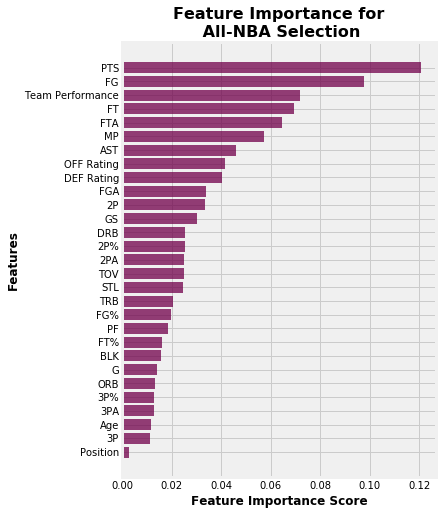

In [30]:
# Set size of figure:
plt.figure(figsize=(5,8))

# Change labels of feature names in dataset:

feature_importance_binary['Feature']=np.where(feature_importance_binary['Feature'] == 'ORtg', 'OFF Rating', 
         np.where(feature_importance_binary['Feature'] == 'DRtg', 'DEF Rating',
                  np.where(feature_importance_binary['Feature'] == 'Win_Prop', 'Team Performance',
                           np.where(feature_importance_binary['Feature'] =="All_NBA_Pos", "Position",
                  feature_importance_binary['Feature']))))



plt.barh(width = feature_importance_binary['Importance'],
       y = feature_importance_binary['Feature'], color = '#71004B', alpha = 0.75, )


plt.xlabel('Feature Importance Score', fontweight = "bold")
plt.ylabel('Features',fontweight = "bold")
plt.title("Feature Importance for\n All-NBA Selection",
          fontsize = 16, fontweight = "bold")

plt.savefig('feature_importance.png', bbox_inches='tight')

In [31]:
rfc_performance = all_nba_test_report(test_index = y_test.index, entire_data=copycat_dat,
                                        y_pred = rfc_predictions)

rfc_performance

Prediction Total  True Total
All NBA Team                              
1st                         34          39
2nd                         27          39
3rd                         16          39
Not Selected                12           0

In [32]:
# --> Which All nba players to we miss?
players_missed(entire_dat=copycat_dat, test_index=X_test.index, y_pred=rfc_predictions)

/Users/petertea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/petertea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Player  Age   G  GS    MP    FG   FGA    FG%   3P   3PA  \
826    Latrell Sprewell   23  82  82  3533   8.4  19.4  0.433  1.9   5.4   
1546         Jason Kidd   25  50  50  2060   8.0  18.1  0.444  1.2   3.2   
1991         Jason Kidd   28  82  82  3056   7.6  19.5  0.391  2.0   6.2   
2486         Steve Nash   30  75  75  2573   8.4  16.7  0.502  1.8   4.2   
4057         Marc Gasol   30  81  81  2687  10.3  20.8  0.494  0.1   0.3   
1319          Vin Baker   26  82  82  2944  11.5  21.1  0.542  0.0   0.1   
1364       Tim Hardaway   31  81  81  3031  10.0  23.3  0.431  2.8   8.0   
1625       Chris Webber   25  42  42  1719  11.0  22.6  0.486  0.1   1.0   
1867    Dikembe Mutombo   34  75  75  2591   5.4  11.3  0.484  0.0   0.0   
2364        Ben Wallace   29  81  81  3050   5.6  13.4  0.421  0.0   0.1   
2691        Ben Wallace   31  82  82  2890   4.5   8.9  0.510  0.0   0.1   
3538       Andrew Bynum   24  60  60  2112  11.1  20.0  0.558  0.0   0.1   
3613         Kevin Love   23  55  55  2145  11.4  25.4  0.448  2.5   6.8   
3739      Blake Griffin   23  80  80  2598  11.7  21.7  0.538  0.1   0.6   
3790        Tony Parker   30  66  66  2174  12.2  23.3  0.522  0.6   1.6   
3960        Tony Parker   31  68  68  1997  11.5  23.1  0.499  0.6   1.7   
4036   DeMarcus Cousins   24  59  59  2013  12.5  26.7  0.467  0.1   0.2   
86        Robert Parish   35  80  80  2840  10.3  18.0  0.570  0.0   0.0   
95           Mark Price   24  75  74  2728   9.5  18.1  0.526  1.7   3.8   
611        Tim Hardaway   26  66  66  2609   9.6  21.6  0.447  1.9   5.7   
1117     Mitch Richmond   30  81  81  2946  10.7  23.9  0.447  3.9   9.0   
1205  Anfernee Hardaway   25  59  59  2221  10.3  23.0  0.447  2.1   6.5   
1522      Kevin Garnett   22  47  47  1780  12.3  26.7  0.460  0.1   0.4   
1708    Stephon Marbury   22  74  74  2881  10.2  23.7  0.432  1.2   4.2   
1879        Gary Payton   32  79  79  3244  11.7  25.7  0.456  1.6   4.4   
2320           Yao Ming   23  82  82  2692  10.9  20.8  0.522  0.0   0.0   
2338       Michael Redd   24  82  82  3021  11.0  25.0  0.440  2.2   6.3   
2469       Shawn Marion   26  81  81  3146   9.8  20.5  0.476  1.8   5.4   
2633       Shawn Marion   27  81  81  3263  11.0  21.0  0.525  1.5   4.5   
2772      Dwight Howard   21  82  82  3023   9.3  15.4  0.603  0.0   0.0   
2880      Carlos Boozer   26  81  81  2827  12.9  23.6  0.547  0.0   0.0   
3245          Pau Gasol   29  65  65  2403   9.7  18.2  0.536  0.0   0.1   
3322        Brandon Roy   25  65  65  2419  11.1  23.5  0.473  1.7   5.0   
3484      Zach Randolph   29  75  74  2724  11.5  22.8  0.503  0.2   0.8   
3355  LaMarcus Aldridge   25  81  81  3211  12.0  24.1  0.500  0.1   0.4   
3628      Dirk Nowitzki   33  62  62  2079  11.9  26.1  0.457  2.0   5.4   
4211     Andre Drummond   22  81  81  2666  10.5  20.1  0.521  0.0   0.1   
4304      Klay Thompson   25  80  80  2666  11.8  25.1  0.470  5.0  11.8   
4343       Jimmy Butler   27  76  75  2809  10.2  22.5  0.455  1.6   4.4   
4805       Kemba Walker   28  82  82  2863  12.4  28.6  0.434  4.4  12.4   

        3P%    2P   2PA    2P%    FT   FTA    FT%  ORB   DRB   TRB   AST  STL  \
826   0.361   6.5  14.1  0.460   4.8   6.3  0.774  1.1   4.4   5.5   5.3  2.5   
1546  0.366   6.9  14.9  0.461   4.7   6.2  0.757  2.3   6.5   8.8  14.0  3.0   
1991  0.321   5.6  13.2  0.424   3.4   4.2  0.814  2.2   8.0  10.2  13.8  3.0   
2486  0.431   6.5  12.4  0.526   4.1   4.6  0.887  1.1   3.7   4.8  16.7  1.4   
4057  0.176  10.2  20.5  0.500   6.8   8.5  0.795  2.2  10.0  12.2   6.0  1.4   
1319  0.143  11.4  21.0  0.545   5.6   9.6  0.591  5.2   6.7  11.9   2.8  1.7   
1364  0.351   7.3  15.4  0.472   4.6   5.9  0.781  0.9   4.5   5.4  12.1  2.4   
1625  0.118  10.9  21.6  0.503   2.3   5.1  0.454  4.3  11.5  15.9   5.0  1.7   
1867  0.000   5.4  11.3  0.484   4.3   5.9  0.725  6.2  14.3  20.6   1.5  0.6   
2364  0.125   5.6  13.3  0.424   2.5   5.2  0.490  5.8  12.2  18.0   2.5  2.6   
2691  0.0

In [33]:
# --> Predict 2020
rfc_probs_2020 = rfc_binary.predict_proba(features_2020)
rfc__2020 = rfc_binary.predict(features_2020)


rfc_predictions_2020 = predict_2020(positions=position_encoder.inverse_transform(features_2020['All_NBA_Pos']),
            player_names=current_dat['Player'],
            binary_prediction=rfc__2020,
            probability_predictions= rfc_probs_2020[:,1])

rfc_predictions_2020.to_csv("rfc_predictions_2020.csv")
rfc_predictions_2020


Position  Probability  Selection                 Player
Position                                                            
Center   117   Center        0.840          1          Anthony Davis
         170   Center        0.530          1            Rudy Gobert
         254   Center        0.425          0           Nikola Jokić
         140   Center        0.335          0            Joel Embiid
         194   Center        0.315          0       Montrezl Harrell
Forward  11   Forward        0.850          1  Giannis Antetokounmpo
         243  Forward        0.760          1           LeBron James
         287  Forward        0.680          1          Kawhi Leonard
         328  Forward        0.335          0        Khris Middleton
         166  Forward        0.290          0            Paul George
         503  Forward        0.270          0        Zion Williamson
         78   Forward        0.260          0           Jimmy Butler
         450  Forward        0.255          0           Jayson Tatum
Guard    191    Guard        0.780          1           James Harden
         128    Guard        0.710          1            Luka Dončić
         491    Guard        0.535          1      Russell Westbrook
         290    Guard        0.440          0         Damian Lillard
         510    Guard        0.415          0             Trae Young
         33     Guard        0.380          0           Bradley Beal
         335    Guard        0.345          0       Donovan Mitchell
         234    Guard        0.330          0           Kyrie Irving

In [34]:
## Random forest but with only 10 features
#feature_importance_binary = pd.DataFrame({'Importance': np.array(rfc_binary.feature_importances_),
 #                                     'Feature': np.array(X_train.columns) })

#feature_importance_binary = feature_importance_binary.sort_values(by = ['Importance'], ascending=False).head(30)

#feature_importance_binary

# Generalized Additive Models

In [35]:
from pygam import LogisticGAM


#Fit a GAM model with the default parameters
gam_model =  LogisticGAM()
gam_model.fit(X_train, y_train)

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + intercept,
   tol=0.0001, verbose=False)

In [36]:
gam_pred = gam_model.predict(X_test)


gam_confusion_matrix = confusion_matrix(y_test, gam_pred)

print("GAM Confusion Matrix:")
print(gam_confusion_matrix)


print("\nGAM Precisions:")
print(classification_report(y_test,  gam_pred))

GAM Confusion Matrix:
[[1060   28]
 [  24   93]]

GAM Precisions:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1088
           1       0.77      0.79      0.78       117

    accuracy                           0.96      1205
   macro avg       0.87      0.88      0.88      1205
weighted avg       0.96      0.96      0.96      1205



In [37]:
gam_performance = all_nba_test_report(test_index = y_test.index, entire_data=copycat_dat,
                                        y_pred = gam_pred)

gam_performance

Prediction Total  True Total
All NBA Team                              
1st                       38.0          39
2nd                       32.0          39
3rd                       23.0          39
Not Selected              28.0           0

In [38]:
gam_predict_probs_2020 = gam_model.predict_proba(features_2020)
gam_predict_binary_2020 = gam_model.predict(features_2020)

gam_predictions_2020 = predict_2020(positions=position_encoder.inverse_transform(features_2020['All_NBA_Pos']),
            player_names=current_dat['Player'],
            binary_prediction= gam_predict_binary_2020,
            probability_predictions= gam_predict_probs_2020)

gam_predictions_2020.to_csv("gam_predictions_2020.csv")
gam_predictions_2020


Position  Probability  Selection                 Player
Position                                                            
Center   117   Center     0.966057       True          Anthony Davis
         170   Center     0.959871       True            Rudy Gobert
         254   Center     0.958126       True           Nikola Jokić
         494   Center     0.293735      False       Hassan Whiteside
         140   Center     0.268393      False            Joel Embiid
Forward  11   Forward     1.000000       True  Giannis Antetokounmpo
         243  Forward     0.999847       True           LeBron James
         287  Forward     0.979465       True          Kawhi Leonard
         1    Forward     0.680044       True            Bam Adebayo
         450  Forward     0.214793      False           Jayson Tatum
         436  Forward     0.179912      False          Pascal Siakam
         328  Forward     0.176131      False        Khris Middleton
         78   Forward     0.087259      False           Jimmy Butler
Guard    191    Guard     0.999966       True           James Harden
         128    Guard     0.998026       True            Luka Dončić
         479    Guard     0.668352       True           Kemba Walker
         491    Guard     0.625373       True      Russell Westbrook
         296    Guard     0.576585       True             Kyle Lowry
         335    Guard     0.186243      False       Donovan Mitchell
         290    Guard     0.158247      False         Damian Lillard
         279    Guard     0.058364      False            Zach LaVine

# K-Nearest-Neighbours

In [39]:
# --> Standardize all continuous features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train.drop('All_NBA_Pos',axis=1))

scaled_X_train = pd.DataFrame(scaler.transform(X_train.drop('All_NBA_Pos',axis=1)))
 
scaled_X_test = pd.DataFrame(scaler.transform(X_test.drop('All_NBA_Pos',axis=1)))

In [40]:
scaled_X_train.mean()
scaled_X_test.mean()

0     0.007807
1    -0.037845
2    -0.002717
3    -0.040525
4     0.001809
5    -0.022314
6     0.063714
7    -0.032722
8    -0.035782
9    -0.039079
10    0.018412
11    0.003664
12    0.059998
13   -0.014040
14    0.000681
15   -0.043500
16    0.040010
17    0.039488
18    0.041964
19   -0.021044
20   -0.031552
21    0.059274
22   -0.021908
23    0.002826
24   -0.010936
25    0.025399
26   -0.063289
27    0.022339
dtype: float64

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# How to choose value of k?
### --> Maybe use elbow method to choose k?
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))


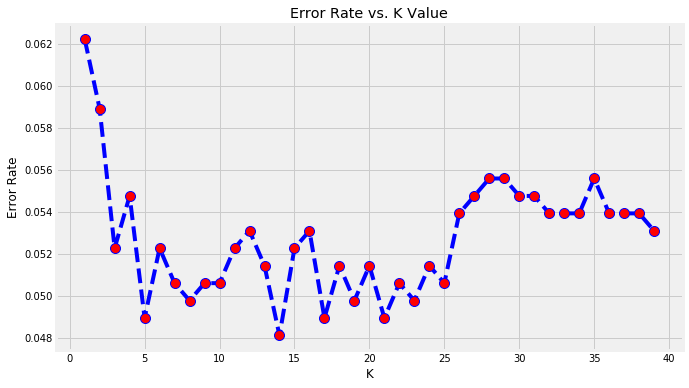

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

plt.savefig('knn.png', bbox_inches='tight')

In [43]:
knn_model = KNeighborsClassifier(n_neighbors=14)

knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [44]:
knn_pred = knn_model.predict(scaled_X_test)

In [45]:
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)

print("KNN Confusion Matrix:")
print(knn_confusion_matrix)


print("\nKNN Precisions:")
print(classification_report(y_test,  knn_pred))

KNN Confusion Matrix:
[[1081    7]
 [  51   66]]

KNN Precisions:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1088
           1       0.90      0.56      0.69       117

    accuracy                           0.95      1205
   macro avg       0.93      0.78      0.83      1205
weighted avg       0.95      0.95      0.95      1205



In [46]:
knn_performance  = all_nba_test_report(test_index = y_test.index, entire_data=copycat_dat,
                                        y_pred = knn_pred)

#knn_model_performance.to_csv('knn_performance.csv')
knn_performance 

Prediction Total  True Total
All NBA Team                              
1st                         33          39
2nd                         21          39
3rd                         12          39
Not Selected                 7           0

In [47]:
# --> Predict 2020 season

# Standardize features
# --> Predict 2020 season
scaler.fit(current_dat[features_to_keep].drop('All_NBA_Pos',axis=1))
scaled_2020_dat = scaler.transform(current_dat[features_to_keep].drop('All_NBA_Pos',axis=1))

# Nice dataframe
scaled_features_2020 = pd.DataFrame(scaled_2020_dat)

#scaled_features_2020['All_NBA_Pos'] = position_encoder.fit_transform(current_dat['All_NBA_Pos'])
scaled_features_2020


0         1         2         3         4         5         6  \
0   -0.054465  0.353373  0.724822 -0.230423 -0.339676 -1.178297  2.158504   
1   -1.069064  0.960601  1.108057  1.458612 -0.052374 -0.790210  1.754482   
2    1.974734 -0.080361  0.451082  0.247843  0.686402  0.435330  0.508746   
3   -1.322714  0.873854  0.724822 -0.021497 -0.544891 -1.566384  3.084389   
4   -0.308115  0.266627  0.670074  0.270498  2.943772  2.028531  1.417796   
..        ...       ...       ...       ...       ...       ...       ...   
158 -0.561764  0.006386  0.505830  0.509631  0.809531  1.027674 -0.265630   
159  1.721084  0.526867 -2.012573  0.255395  0.317014  0.843843 -0.787492   
160 -1.830014 -3.029751 -1.410346 -2.745098  2.081867  0.884694  2.124835   
161 -0.815414 -3.723725 -2.176817 -3.281260 -0.873236 -0.340845 -1.258852   
162 -1.322714  0.526867  0.834318  1.169135  1.219962  1.620017 -0.433973   

            7         8         9        10        11        12        13  \
0   -1.875268 -2.026039 -0.086244  0.621510  0.291886  1.306045 -0.323791   
1   -1.875268 -1.969673 -2.990846  0.910957  0.662779  1.014233  0.459394   
2   -0.669334 -0.842367  0.549137  0.947138  1.054278  0.035805  0.067801   
3   -1.875268 -2.026039 -3.864495  0.476787 -0.099613  2.353134  0.024291   
4   -0.314648 -0.081436 -0.392589  2.756177  2.105142  1.803842  2.286825   
..        ...       ...       ...       ...       ...       ...       ...   
158  0.110975  0.313121 -0.097590  0.657691  0.807015 -0.187345  0.285353   
159  0.181913  0.172208  0.254139  0.223522  0.724595 -1.285931  1.460130   
160 -1.520582 -1.744212  1.377403  2.611454  2.166958  1.340376  1.677681   
161 -1.307770 -0.983281 -1.345661 -0.102105  0.394912 -1.474750 -0.715384   
162  1.316909  1.468610  0.231447  0.404426  0.559753 -0.273172  2.808948   

           14        15        16        17        18        19        20  \
0    0.149938 -2.360370  2.973697  1.311462  1.975860 -0.309364  0.184800   
1    0.781098 -1.153909  1.222568  1.486223  1.506377  0.669460  0.385615   
2   -0.025384  0.498942  0.662206  0.297845  0.443864 -0.613137 -1.020094   
3    0.535647 -1.998432  2.623471  1.660985  2.099408 -0.984415 -0.819279   
4    3.340803 -1.841592  1.082477  3.443552  2.815987  1.074491 -0.016016   
..        ...       ...       ...       ...       ...       ...       ...   
158  0.500583 -0.924682 -0.108291 -0.645867 -0.495102 -0.106849 -0.819279   
159  1.166807  0.933268 -0.738697 -0.995390 -0.964585  1.310758 -0.819279   
160  2.499256 -1.696817  1.852974 -0.331296  0.394444 -0.646889 -0.417647   
161 -0.516286 -1.431395  0.241935  0.297845  0.295606  0.264429 -1.020094   
162  2.464191  0.897074 -0.808743 -0.750724 -0.816327  2.357087 -0.216832   

           21        22        23        24        25        26        27  
0    1.277470 -0.270036 -0.241507 -0.744543  1.510127 -1.092096  0.717833  
1    1.157799  0.876669 -0.133950 -0.252502  0.707898 -1.092096  0.824109  
2    1.756154 -0.887492 -0.241507  0.369785  0.440488  0.589526 -0.663760  
3    1.756154 -0.799284  0.403831 -0.759015  2.446061 -1.332328 -0.344931  
4    0.679115  2.111581  0.834055  2.743160  0.574193 -3.494413  2.099426  
..        ...       ...       ...       ...       ...       ...       ...  
158  0.439773  0.259213 -0.564175  0.688165 -0.896561  0.829757 -0.093410  
159 -0.756937  1.405917 -1.747293  0.746052 -0.361741  0.109062  1.142939  
160 -0.278253  1.053085 -1.209512  1.701191  0.574193  0.589526 -0.557484  
161 -0.278253  0.259213  1.694505 -1.106338 -2.501019  0.109062  0.824109  
162 -0.876609  2.993662 -1.532181  2.062986  0.306783  1.550452 -1.407695  

[163 rows x 28 columns]

In [48]:
knn_predict_probs_2020 = knn_model.predict_proba(scaled_features_2020)
knn_predict_binary_2020 = knn_model.predict(scaled_features_2020)


knn_predictions_2020  = predict_2020(positions=position_encoder.inverse_transform(features_2020['All_NBA_Pos']),
            player_names=current_dat['Player'],
            binary_prediction= knn_predict_binary_2020,
            probability_predictions= knn_predict_probs_2020[:,1])


knn_predictions_2020.to_csv("knn_predictions_2020.csv")
knn_predictions_2020 

Position  Probability  Selection                 Player
Position                                                            
Center   117   Center     0.928571          1          Anthony Davis
         254   Center     0.785714          1           Nikola Jokić
         140   Center     0.500000          0            Joel Embiid
         134   Center     0.285714          0         Andre Drummond
         170   Center     0.285714          0            Rudy Gobert
Forward  287  Forward     1.000000          1          Kawhi Leonard
         11   Forward     0.928571          1  Giannis Antetokounmpo
         243  Forward     0.928571          1           LeBron James
         450  Forward     0.357143          0           Jayson Tatum
         78   Forward     0.285714          0           Jimmy Butler
         166  Forward     0.214286          0            Paul George
         436  Forward     0.142857          0          Pascal Siakam
         47   Forward     0.142857          0       Bojan Bogdanović
Guard    191    Guard     0.928571          1           James Harden
         128    Guard     0.857143          1            Luka Dončić
         290    Guard     0.428571          0         Damian Lillard
         491    Guard     0.428571          0      Russell Westbrook
         33     Guard     0.428571          0           Bradley Beal
         510    Guard     0.285714          0             Trae Young
         335    Guard     0.214286          0       Donovan Mitchell
         296    Guard     0.214286          0             Kyle Lowry

# Support Vector Machines

In [49]:
from sklearn.svm import SVC
# --> SVC = Support Vector Classifier
# --> C parameter allows you to choose how much you want to penalize misclassified points
#|--> Low C prioritizes simplicity (high bias, low variance)
#|--> High C may lead to overfitting

# --> kernel = rbf is the radial basis function
# --> If kernel = rbf, then we need an additional gamma parameter
# --> Basically LOW gamma goes for a simple fit, whereas a HIGH gamma goes for a complex fit

SVMmodel = SVC(probability = True, kernel = 'rbf')
SVMmodel.fit(scaled_X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
SVM_predictions = SVMmodel.predict(scaled_X_test)

In [51]:
print(classification_report(y_test,SVM_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1088
           1       0.80      0.74      0.77       117

    accuracy                           0.96      1205
   macro avg       0.89      0.86      0.87      1205
weighted avg       0.96      0.96      0.96      1205



In [52]:
svm_model_performance = all_nba_test_report(test_index = y_test.index, entire_data=copycat_dat,
                                        y_pred = SVM_predictions)

#svm_model_performance.to_csv('svm_performance.csv')
svm_model_performance

Prediction Total  True Total
All NBA Team                              
1st                         36          39
2nd                         31          39
3rd                         20          39
Not Selected                22           0

In [53]:
# --> Which All nba players to we miss?
players_missed(entire_dat=copycat_dat, test_index=X_test.index, y_pred=SVM_predictions)

/Users/petertea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/petertea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Player  Age   G  GS    MP    FG   FGA    FG%   3P   3PA  \
826    Latrell Sprewell   23  82  82  3533   8.4  19.4  0.433  1.9   5.4   
1546         Jason Kidd   25  50  50  2060   8.0  18.1  0.444  1.2   3.2   
1991         Jason Kidd   28  82  82  3056   7.6  19.5  0.391  2.0   6.2   
1319          Vin Baker   26  82  82  2944  11.5  21.1  0.542  0.0   0.1   
1625       Chris Webber   25  42  42  1719  11.0  22.6  0.486  0.1   1.0   
1867    Dikembe Mutombo   34  75  75  2591   5.4  11.3  0.484  0.0   0.0   
2364        Ben Wallace   29  81  81  3050   5.6  13.4  0.421  0.0   0.1   
3130           Yao Ming   28  77  77  2589  11.6  21.2  0.548  0.0   0.0   
3538       Andrew Bynum   24  60  60  2112  11.1  20.0  0.558  0.0   0.1   
3613         Kevin Love   23  55  55  2145  11.4  25.4  0.448  2.5   6.8   
3960        Tony Parker   31  68  68  1997  11.5  23.1  0.499  0.6   1.7   
86        Robert Parish   35  80  80  2840  10.3  18.0  0.570  0.0   0.0   
611        Tim Hardaway   26  66  66  2609   9.6  21.6  0.447  1.9   5.7   
1117     Mitch Richmond   30  81  81  2946  10.7  23.9  0.447  3.9   9.0   
1205  Anfernee Hardaway   25  59  59  2221  10.3  23.0  0.447  2.1   6.5   
1522      Kevin Garnett   22  47  47  1780  12.3  26.7  0.460  0.1   0.4   
1708    Stephon Marbury   22  74  74  2881  10.2  23.7  0.432  1.2   4.2   
2320           Yao Ming   23  82  82  2692  10.9  20.8  0.522  0.0   0.0   
2338       Michael Redd   24  82  82  3021  11.0  25.0  0.440  2.2   6.3   
2469       Shawn Marion   26  81  81  3146   9.8  20.5  0.476  1.8   5.4   
2633       Shawn Marion   27  81  81  3263  11.0  21.0  0.525  1.5   4.5   
2772      Dwight Howard   21  82  82  3023   9.3  15.4  0.603  0.0   0.0   
2880      Carlos Boozer   26  81  81  2827  12.9  23.6  0.547  0.0   0.0   
3245          Pau Gasol   29  65  65  2403   9.7  18.2  0.536  0.0   0.1   
3322        Brandon Roy   25  65  65  2419  11.1  23.5  0.473  1.7   5.0   
3484      Zach Randolph   29  75  74  2724  11.5  22.8  0.503  0.2   0.8   
3355  LaMarcus Aldridge   25  81  81  3211  12.0  24.1  0.500  0.1   0.4   
3628      Dirk Nowitzki   33  62  62  2079  11.9  26.1  0.457  2.0   5.4   
4211     Andre Drummond   22  81  81  2666  10.5  20.1  0.521  0.0   0.1   
4304      Klay Thompson   25  80  80  2666  11.8  25.1  0.470  5.0  11.8   

        3P%    2P   2PA    2P%   FT   FTA    FT%  ORB   DRB   TRB   AST  STL  \
826   0.361   6.5  14.1  0.460  4.8   6.3  0.774  1.1   4.4   5.5   5.3  2.5   
1546  0.366   6.9  14.9  0.461  4.7   6.2  0.757  2.3   6.5   8.8  14.0  3.0   
1991  0.321   5.6  13.2  0.424  3.4   4.2  0.814  2.2   8.0  10.2  13.8  3.0   
1319  0.143  11.4  21.0  0.545  5.6   9.6  0.591  5.2   6.7  11.9   2.8  1.7   
1625  0.118  10.9  21.6  0.503  2.3   5.1  0.454  4.3  11.5  15.9   5.0  1.7   
1867  0.000   5.4  11.3  0.484  4.3   5.9  0.725  6.2  14.3  20.6   1.5  0.6   
2364  0.125   5.6  13.3  0.424  2.5   5.2  0.490  5.8  12.2  18.0   2.5  2.6   
3130  1.000  11.6  21.2  0.548  7.8   9.0  0.866  4.2  11.4  15.6   2.8  0.6   
3538  0.200  11.1  19.9  0.560  5.9   8.5  0.692  4.8  13.0  17.8   2.1  0.7   
3613  0.372   8.8  18.6  0.475  9.1  11.0  0.824  5.4  12.2  17.6   2.7  1.1   
3960  0.373  10.9  21.4  0.509  5.0   6.1  0.811  0.4   3.5   3.9   9.8  0.9   
86    0.000  10.3  18.0  0.570  5.1   7.0  0.719  5.9  11.3  17.2   3.0  1.4   
611   0.330   7.8  15.9  0.489  5.0   6.8  0.744  1.1   3.8   4.9  12.9  2.1   
1117  0.437   6.7  14.9  0.453  7.4   8.6  0.866  0.9   3.8   4.7   4.4  2.2   
1205  0.318   8.2  16.5  0.499  6.9   8.4  0.820  2.0   4.4   6.4   8.1  2.3   
1522  0.286  12.1  26.2  0.463  4.3   6.1  0.704  4.9   9.6  14.5   6.0  2.3   
1708  0.283   9.1  19.5  0.464  7.9   9.7  0.813  1.1   3.2   4.3  11.2  2.0   
2320  0.000  10.9  20.8  0.523  7.3   9.1  0.809  4.0  10.9  14.9   2.5  0.4   
2338  0.350   8.8  18.7  0.470  6.6   7.7  0.868  2.0   5.0   7.1   3.2  1.4   
2469  0.334   7.9  15.1  0.526  3.6   4.4  0.833  3.7  10.8 

In [54]:
# --> Predict 2020

SVM_predict_probs_2020 = SVMmodel.predict_proba(scaled_features_2020)
SVM_predict_binary_2020 = SVMmodel.predict(scaled_features_2020)


predict_2020(positions=position_encoder.inverse_transform(features_2020['All_NBA_Pos']),
            player_names=current_dat['Player'],
            binary_prediction= SVM_predict_binary_2020,
            probability_predictions= SVM_predict_probs_2020[:,1])

Position  Probability  Selection                 Player
Position                                                            
Center   117   Center     0.995478          1          Anthony Davis
         254   Center     0.865679          1           Nikola Jokić
         140   Center     0.599266          1            Joel Embiid
         170   Center     0.377511          0            Rudy Gobert
         494   Center     0.221259          0       Hassan Whiteside
Forward  243  Forward     0.999989          1           LeBron James
         287  Forward     0.995849          1          Kawhi Leonard
         11   Forward     0.982877          1  Giannis Antetokounmpo
         328  Forward     0.555685          1        Khris Middleton
         450  Forward     0.430241          0           Jayson Tatum
         78   Forward     0.366300          0           Jimmy Butler
         166  Forward     0.185283          0            Paul George
         436  Forward     0.148028          0          Pascal Siakam
Guard    128    Guard     0.992427          1            Luka Dončić
         191    Guard     0.991866          1           James Harden
         290    Guard     0.814199          1         Damian Lillard
         491    Guard     0.397048          0      Russell Westbrook
         510    Guard     0.351273          0             Trae Young
         33     Guard     0.328204          0           Bradley Beal
         386    Guard     0.233185          0             Chris Paul
         479    Guard     0.133023          0           Kemba Walker

In [55]:
### Grid search SVM

#param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

#from sklearn.model_selection import GridSearchCV

#grid = GridSearchCV(SVC(probability = True),param_grid,refit=True,verbose=3)

In [56]:
#grid.fit(X_train_scaled,y_train)

In [57]:
#grid.best_params_

In [58]:
SVMmodel2 = SVC(C =100, gamma = 0.001, kernel = 'rbf', probability = True)
SVMmodel2.fit(scaled_X_train,y_train)
SVM2_predictions = SVMmodel2.predict(scaled_X_test)

In [59]:
print(classification_report(y_test, SVM2_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1088
           1       0.80      0.74      0.77       117

    accuracy                           0.96      1205
   macro avg       0.89      0.86      0.87      1205
weighted avg       0.96      0.96      0.96      1205



In [60]:
svm_performance  = all_nba_test_report(test_index = y_test.index, entire_data=copycat_dat,
                                        y_pred = SVM2_predictions)

#svm_model_performance.to_csv('svm_performance.csv')
svm_performance 

Prediction Total  True Total
All NBA Team                              
1st                         35          39
2nd                         31          39
3rd                         21          39
Not Selected                22           0

In [61]:
# --> Predict 2020

SVM2_predict_probs_2020 = SVMmodel2.predict_proba(scaled_features_2020)
SVM2_predict_binary_2020 = SVMmodel2.predict(scaled_features_2020)


svm_predictions_2020 = predict_2020(positions=position_encoder.inverse_transform(features_2020['All_NBA_Pos']),
            player_names=current_dat['Player'],
            binary_prediction= SVM2_predict_binary_2020,
            probability_predictions= SVM2_predict_probs_2020[:,1])

svm_predictions_2020.to_csv("svm_predictions_2020.csv")

svm_predictions_2020

Position  Probability  Selection                 Player
Position                                                            
Center   117   Center     0.986785          1          Anthony Davis
         170   Center     0.874996          1            Rudy Gobert
         254   Center     0.821640          1           Nikola Jokić
         140   Center     0.527295          1            Joel Embiid
         494   Center     0.505501          0       Hassan Whiteside
Forward  11   Forward     1.000000          1  Giannis Antetokounmpo
         243  Forward     0.999996          1           LeBron James
         287  Forward     0.947753          1          Kawhi Leonard
         78   Forward     0.543984          1           Jimmy Butler
         328  Forward     0.512343          1        Khris Middleton
         1    Forward     0.378796          0            Bam Adebayo
         450  Forward     0.357313          0           Jayson Tatum
         436  Forward     0.286770          0          Pascal Siakam
Guard    191    Guard     0.999990          1           James Harden
         128    Guard     0.996175          1            Luka Dončić
         290    Guard     0.833648          1         Damian Lillard
         510    Guard     0.644183          1             Trae Young
         491    Guard     0.628362          1      Russell Westbrook
         33     Guard     0.336647          0           Bradley Beal
         438    Guard     0.313305          0            Ben Simmons
         296    Guard     0.262528          0             Kyle Lowry

These are the exact same predictions as the previous SVM Model...

In [62]:
from xgboost import XGBClassifier


# --> Train model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

In [63]:
xgb_performance = all_nba_test_report(test_index = y_test.index, entire_data=copycat_dat,
                                        y_pred = xgb_predictions )

xgb_performance

Prediction Total  True Total
All NBA Team                              
1st                         34          39
2nd                         29          39
3rd                         18          39
Not Selected                19           0

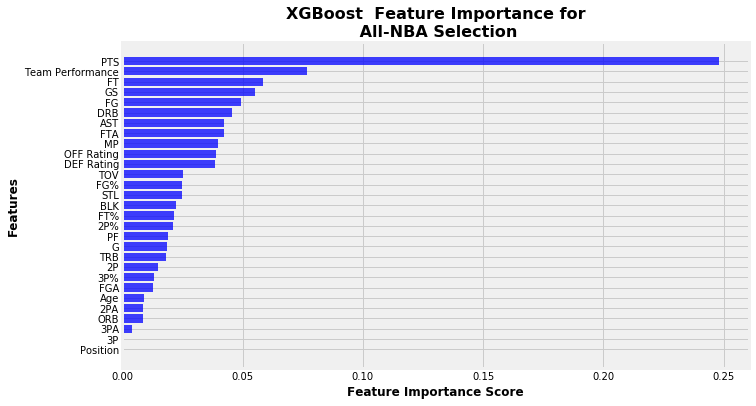

In [71]:
# --> xgboost feature importance
	
#print(xgb_model.feature_importances_)


xgb_feature_dat = pd.DataFrame({'Importance': xgb_model.feature_importances_,
                                      'Feature': X_train.columns})

xgb_feature_importance = xgb_feature_dat .sort_values(by = ['Importance'], ascending=True).tail(30)


xgb_feature_importance['Feature']=np.where(xgb_feature_importance['Feature'] == 'ORtg', 'OFF Rating', 
         np.where(xgb_feature_importance['Feature'] == 'DRtg', 'DEF Rating',
                  np.where(xgb_feature_importance['Feature'] == 'Win_Prop', 'Team Performance',
                           np.where(xgb_feature_importance['Feature'] =="All_NBA_Pos", "Position",
                  xgb_feature_importance['Feature']))))


plt.figure(figsize=(10,6))
plt.barh(width = xgb_feature_importance['Importance'],
       y = xgb_feature_importance['Feature'], color = 'blue', alpha = 0.75)


plt.xlabel('Feature Importance Score', fontweight = "bold")
plt.ylabel('Features',fontweight = "bold")
plt.title("XGBoost  Feature Importance for\n All-NBA Selection",
          fontsize = 16, fontweight = "bold")

#plt.show()
plt.savefig('xgb_feature_importance.png', bbox_inches='tight')

In [65]:
# --> xgboost 2020 predictions
xgb_predict_probs_2020 = xgb_model.predict_proba(features_2020)
xgb_predict_binary_2020 = xgb_model.predict(features_2020)

xgb_predictions_2020 = predict_2020(positions=position_encoder.inverse_transform(features_2020['All_NBA_Pos']),
            player_names=current_dat['Player'],
            binary_prediction= xgb_predict_binary_2020,
            probability_predictions= xgb_predict_probs_2020[:,1])


xgb_predictions_2020.to_csv('xgb_predictions_2020.csv')
xgb_predictions_2020

Position  Probability  Selection                 Player
Position                                                            
Center   117   Center     0.891604          1          Anthony Davis
         254   Center     0.647077          1           Nikola Jokić
         170   Center     0.292200          0            Rudy Gobert
         194   Center     0.099599          0       Montrezl Harrell
         140   Center     0.091292          0            Joel Embiid
Forward  11   Forward     0.983376          1  Giannis Antetokounmpo
         243  Forward     0.966854          1           LeBron James
         287  Forward     0.906182          1          Kawhi Leonard
         328  Forward     0.532809          1        Khris Middleton
         78   Forward     0.288364          0           Jimmy Butler
         436  Forward     0.244382          0          Pascal Siakam
         450  Forward     0.221210          0           Jayson Tatum
         47   Forward     0.109195          0       Bojan Bogdanović
Guard    128    Guard     0.899571          1            Luka Dončić
         191    Guard     0.862128          1           James Harden
         491    Guard     0.593768          1      Russell Westbrook
         335    Guard     0.500592          1       Donovan Mitchell
         479    Guard     0.413430          0           Kemba Walker
         290    Guard     0.409711          0         Damian Lillard
         510    Guard     0.381340          0             Trae Young
         33     Guard     0.336478          0           Bradley Beal

In [66]:
# Combine all results...
def get_votes(dat):
    '''
    Create new column where 1st team players awarded 5 votes,
    2nd team players 3 votes and 3rd team players 1 vote
    '''
    
    pred_alg = dat.copy()
    
    pred_alg['number'] = np.arange(0,dat.shape[0])
    
    first = np.array([0,5,6,13,14])
    second = np.array([1,7,8,15,16])
    third =  np.array([2,9,10,17,18])
    #reserves = np.array([3,4,11,12,19,20])
    
    pred_alg['votes'] = np.where(pred_alg['number'].isin(first), 3 , 
            np.where(pred_alg['number'].isin(second), 2,
             np.where(pred_alg['number'].isin(third), 1, 0.5)
             ))
    
    return pred_alg
    


df = pd.DataFrame()

results = [logreg_2020_predictions, rfc_predictions_2020,
           gam_predictions_2020, knn_predictions_2020, svm_predictions_2020, xgb_predictions_2020]

for alg_results in results:
    df = df.append(get_votes(alg_results), ignore_index=True)


df_agg = df.groupby(['Position','Player']).sum()[['votes']]
df_agg.sort_values('votes', ascending = False)


votes_data = pd.DataFrame()
for position in ['Center', 'Forward', 'Guard']:
    sorted_dat = df_agg.iloc[df_agg.index.get_level_values('Position') == position].sort_values('votes', ascending = False)
    
    votes_data = votes_data.append(sorted_dat)

# --> Save data
votes_data
votes_data.to_csv("votes_data.csv")

In [67]:
votes_data

votes
Position Player                      
Center   Anthony Davis           18.0
         Nikola Jokić             9.0
         Rudy Gobert              8.5
         Joel Embiid              3.5
         Hassan Whiteside         1.0
         Montrezl Harrell         1.0
         Andre Drummond           0.5
         Karl-Anthony Towns       0.5
Forward  Giannis Antetokounmpo   18.0
         LeBron James            17.0
         Kawhi Leonard           13.0
         Jimmy Butler             7.0
         Khris Middleton          6.5
         Jayson Tatum             5.0
         Bam Adebayo              4.0
         Pascal Siakam            3.0
         Paul George              2.0
         Zion Williamson          1.5
         Bojan Bogdanović         1.0
Guard    James Harden            18.0
         Luka Dončić             18.0
         Russell Westbrook       10.0
         Damian Lillard           9.5
         Trae Young               5.5
         Donovan Mitchell         4.0
         Bradley Beal             3.5
         Kemba Walker             3.0
         Kyrie Irving             2.5
         Kyle Lowry               2.0
         Ben Simmons              1.0
         Chris Paul               0.5
         Zach LaVine              0.5

In [68]:
#logreg_2020_predictions
#rfc_predictions_2020
#gam_predictions_2020
#knn_predictions_2020
#svm_predictions_2020
#xgb_predictions_2020

logreg_performance

Prediction Total  True Total
All NBA Team                              
1st                         36          39
2nd                         28          39
3rd                         20          39
Not Selected                22           0

In [72]:

######################
# Aggregate the model performances

perf = {
        #'All NBA Team':['1st', '2nd', '3rd', 'Not Selected'],
        'Logistic Regression': logreg_performance['Prediction Total'],
        'Random Forest': rfc_performance['Prediction Total'],
        'GAM': gam_performance['Prediction Total'],
        'KNN': knn_performance['Prediction Total'],
        'SVM': svm_performance['Prediction Total'],
        'XGB': xgb_performance['Prediction Total'],
        'True Total': [39,39,39,0]
        }



performances_dat = pd.DataFrame(perf)
performances_dat.to_csv("performances_dat.csv")
performances_dat 

Logistic Regression  Random Forest   GAM  KNN  SVM  XGB  \
All NBA Team                                                            
1st                            36             34  38.0   33   35   34   
2nd                            28             27  32.0   21   31   29   
3rd                            20             16  23.0   12   21   18   
Not Selected                   22             12  28.0    7   22   19   

              True Total  
All NBA Team              
1st                   39  
2nd                   39  
3rd                   39  
Not Selected           0